# TS7: Transformada Z y Respuesta en frecuencia
## Catalina Gonzalez Araujo y Lola Pampin
### 2do cuatrimestre 2025, ECYT - UNSAM

# Introducción

## Filtro de media movil
"Un filtro de media móvil se define como una técnica de procesamiento digital para suavizar datos de series temporales y reducir el ruido al calcular el promedio de un conjunto de datos consecutivos. Utiliza una "ventana" aplicada a los datos, tomando el promedio de las muestras dentro de esa ventana para obtener un nuevo punto de datos filtrado. Es una forma sencilla y eficaz de eliminar fluctuaciones rápidas para ver la tendencia subyacente, actuando como un filtro de paso bajo. "

## Función transferencia

La transformada Z es una herramienta fundamental que permite el análisis de señales y sistemas en el dominio de la frecuencia, especialmente útil cuando la secuencia de tiempo discreto h[n] no es absolutamente sumable (requisito para que exista la DTFT). Modifica la transformada de Fourier agregándole un grado de libertad más para manejar casos donde la secuencia h[n] diverge.

# Desarrollo
## 1. Encontrar la función transferencia T(z)= Y(z)/X(z)
Para la realización de este inciso se aplico la transformada Z a las ecuaciones en diferencias
## 2. Hallar el modulo y la respuesta de fase

In [6]:
# librerias
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Definir variable z
z = sp.Symbol('z')

# Transformada de las ecuaciones en diferencias
T_a = z**(-3) + z**(-2) + z**(-1) + 1
T_b = z**(-4) + z**(-3) + z**(-2) + z**(-1) + 1
T_c = 1 - z**(-1)
T_d = 1 - z**(-2)

print("Forma original:")
print("a) T(z) =", T_a)
print("b) T(z) =", T_b)
print("c) T(z) =", T_c)
print("d) T(z) =", T_d)

# Normalizar (multiplicar por z^k para eliminar potencias negativas)
T_a_norm = sp.expand(T_a * z**3)
T_b_norm = sp.expand(T_b * z**4)
T_c_norm = sp.expand(T_c * z)
T_d_norm = sp.expand(T_d * z**2)

print("\nForma normalizada:")
print("a) T(z) =", T_a_norm)
print("b) T(z) =", T_b_norm)
print("c) T(z) =", T_c_norm)
print("d) T(z) =", T_d_norm)

Forma original:
a) T(z) = 1 + 1/z + z**(-2) + z**(-3)
b) T(z) = 1 + 1/z + z**(-2) + z**(-3) + z**(-4)
c) T(z) = 1 - 1/z
d) T(z) = 1 - 1/z**2

Forma normalizada:
a) T(z) = z**3 + z**2 + z + 1
b) T(z) = z**4 + z**3 + z**2 + z + 1
c) T(z) = z - 1
d) T(z) = z**2 - 1


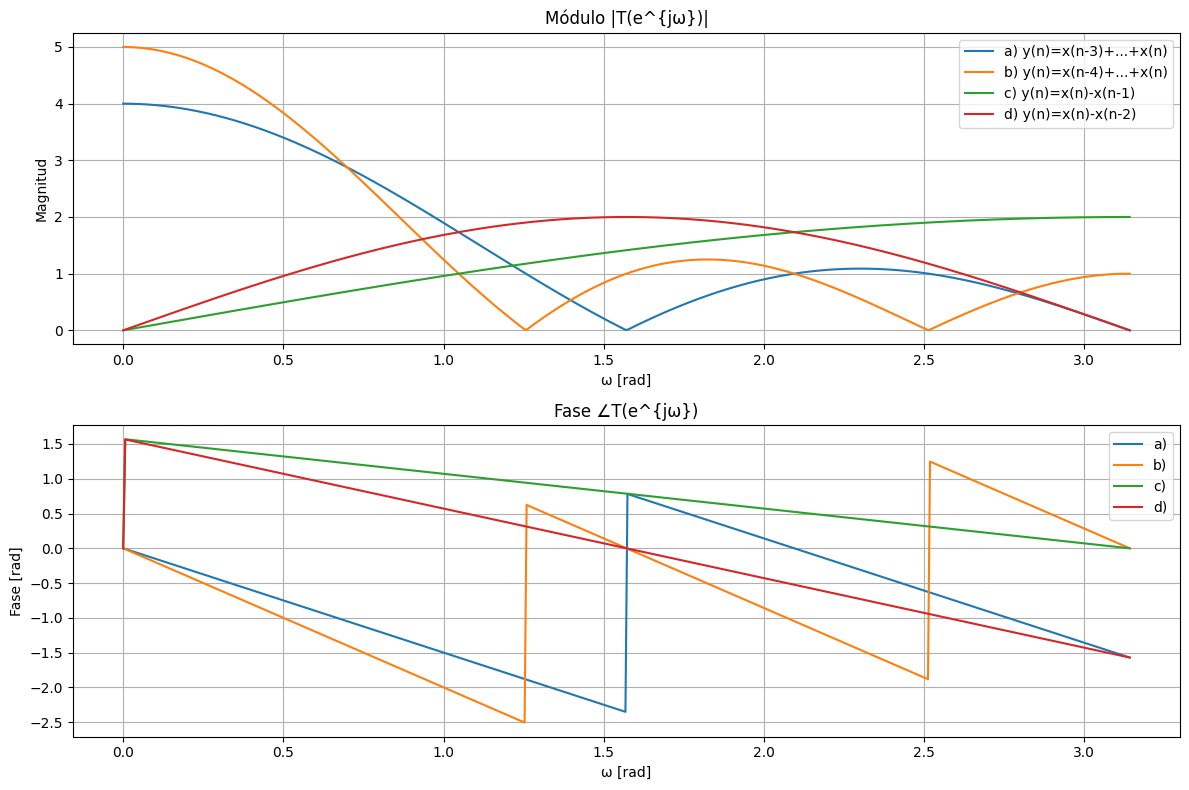

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Rango de frecuencia
omega = np.linspace(0, np.pi, 500)
z = np.exp(1j * omega)  # z = e^{jω}

# Sistemas
T_a = z**(-3) + z**(-2) + z**(-1) + 1
T_b = z**(-4) + z**(-3) + z**(-2) + z**(-1) + 1
T_c = 1 - z**(-1)
T_d = 1 - z**(-2)

# Función para módulo y fase
def mag_phase(T):
    mag = np.abs(T)
    phase = np.angle(T)
    return mag, phase

# Calcular para cada sistema
mag_a, phase_a = mag_phase(T_a)
mag_b, phase_b = mag_phase(T_b)
mag_c, phase_c = mag_phase(T_c)
mag_d, phase_d = mag_phase(T_d)

# Graficar
plt.figure(figsize=(12,8))

# Módulo
plt.subplot(2,1,1)
plt.plot(omega, mag_a, label='a) y(n)=x(n-3)+...+x(n)')
plt.plot(omega, mag_b, label='b) y(n)=x(n-4)+...+x(n)')
plt.plot(omega, mag_c, label='c) y(n)=x(n)-x(n-1)')
plt.plot(omega, mag_d, label='d) y(n)=x(n)-x(n-2)')
plt.title('Módulo |T(e^{jω})|')
plt.xlabel('ω [rad]')
plt.ylabel('Magnitud')
plt.legend()
plt.grid()

# Fase
plt.subplot(2,1,2)
plt.plot(omega, phase_a, label='a)')
plt.plot(omega, phase_b, label='b)')
plt.plot(omega, phase_c, label='c)')
plt.plot(omega, phase_d, label='d)')
plt.title('Fase ∠T(e^{jω})')
plt.xlabel('ω [rad]')
plt.ylabel('Fase [rad]')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()